## Import AutoML and data prep

In [1]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

#h2o.demo("glm")     #not possibile to run the demo on jupyter notebook but on python terminal



Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.221-b11, mixed mode)
  Starting server from C:\Users\J1040904\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\J1040904\AppData\Local\Temp\tmpn6frsvzf
  JVM stdout: C:\Users\J1040904\AppData\Local\Temp\tmpn6frsvzf\h2o_J1040904_started_from_python.out
  JVM stderr: C:\Users\J1040904\AppData\Local\Temp\tmpn6frsvzf\h2o_J1040904_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,3 months and 3 days
H2O_cluster_name:,H2O_from_python_J1040904_761log
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.031 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
training=h2o.upload_file("/Home/DEF/4/J1040904/Desktop/Projects/Data science/Basement project/Python/AutoML H2O/Final run v3/training.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
training.describe()

Rows:461
Cols:14




,ÃƒÆ’Ã‚Â¯Ãƒâ€šÃ‚Â»Ãƒâ€šÃ‚Â¿well_name,long,lat,augila,gialo,gir,zelten,kalash,sirte,nubian,gargaf,basement,seebase,sub-basin
type,string,real,real,real,real,real,real,real,real,real,real,real,real,enum
mins,NaN,17.179581,27.022159,22.95781517,169.5409656,320.9156303,73.14679347,14.8585,19.2,0.509335,3.82149,-4360.180444,-4875.423677,
mean,NaN,20.84880624130436,28.2409778673913,84.40244558556526,401.2414787495651,516.0481603091304,143.15191549452175,81.46145043478266,133.08618219130446,158.47375690652183,70.7664936086957,-2511.615843978264,-2580.7679993304323,
maxs,NaN,23.676663,29.572467,147.9700073,640.5937576,728.374177,206.7392099,238.561,288.0,811.719,284.864,-1277.115338,-1202.990124,
sigma,NaN,1.2057269210996613,0.45547182493971167,20.405969568793715,76.57849691956541,70.57488019354044,27.612292128505974,57.86808531870987,39.943935189441966,160.87830331471852,36.47648186163212,657.6448701634083,683.1700867638465,
zeros,0,0,0,0,0,0,0,0,0,0,0,0,0,
missing,0,1,1,1,1,1,1,1,1,1,1,1,1,0
0,ï»¿well_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,sub-basin
1,A112-59,19.939477,28.244816,85.01280176,383.223604,503.6942209,195.9308705,38.7761,132.26,3.6991,65.0583,-1862.716411,-1862.088515,Zelten Platform (Sirte Basin)
2,A114-59,19.933366,28.244816,85.03108998,380.2548159,504.276396,196.2692026,38.7761,132.26,3.6991,76.0167,-1861.734943,-1823.66496,Zelten Platform (Sirte Basin)


In [4]:
# Identify predictors (features x) and response (target y)
# if all the columns will be used except the response as predictors, it can be avoided to set the `x` argument explicitly.

x = ['long','lat','augila','gialo','gir','zelten','kalash','sirte','nubian','gargaf','seebase','sub-basin']
y = "basement"


In [5]:
#let's split the data into two frames, a `train` (70%) and a `test` frame (30%).  
#The `test` frame will be used to score the leaderboard and to demonstrate how to generate predictions using an AutoML leader model.

train, test = training.split_frame(ratios = [.7], seed = 1234)

## Run AutoML for training

In [6]:
#AutoML


aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "basement1")
aml.train(x=x, y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |
15:14:32.423: AutoML: XGBoost is not available; skipping it.
15:14:32.444: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
15:14:32.445: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_1_20220110_151432_model_12


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,54.0,54.0,23094.0,7.0,7.0,7.0,15.0,45.0,29.351852




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 568.9083691165514
RMSE: 23.851800123188845
MAE: 15.828497006560646
RMSLE: NaN
Mean Residual Deviance: 568.9083691165514

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 18591.428800316273
RMSE: 136.3503898062498
MAE: 80.91685958834542
RMSLE: NaN
Mean Residual Deviance: 18591.428800316273

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,80.445810,9.788828,86.500250,72.060585,81.081220,69.578636,93.00834
1,mean_residual_deviance,18613.310000,2946.500700,17962.205000,14689.858000,21986.021000,17368.610000,21059.85700
2,mse,18613.310000,2946.500700,17962.205000,14689.858000,21986.021000,17368.610000,21059.85700
3,r2,0.955677,0.012034,0.964971,0.969592,0.943263,0.943689,0.95687
4,residual_deviance,18613.310000,2946.500700,17962.205000,14689.858000,21986.021000,17368.610000,21059.85700
5,rmse,136.082380,10.891336,134.023150,121.201730,148.276840,131.790020,145.12015
6,rmsle,NaN,0.000000,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-01-10 15:14:49,2.877 sec,0.0,664.771955,584.011120,441921.752321
1,,2022-01-10 15:14:49,2.886 sec,5.0,399.885602,349.457053,159908.494658
2,,2022-01-10 15:14:49,2.894 sec,10.0,244.036834,210.999358,59553.976535
3,,2022-01-10 15:14:49,2.902 sec,15.0,151.821270,129.260660,23049.698095
4,,2022-01-10 15:14:49,2.910 sec,20.0,98.204110,81.271659,9644.047156
5,,2022-01-10 15:14:49,2.918 sec,25.0,68.115834,54.143391,4639.766868
6,,2022-01-10 15:14:49,2.925 sec,30.0,50.663367,38.486958,2566.776718
7,,2022-01-10 15:14:49,2.931 sec,35.0,40.783865,29.494412,1663.323677
8,,2022-01-10 15:14:49,2.937 sec,40.0,34.758879,24.387104,1208.179672
9,,2022-01-10 15:14:49,2.944 sec,45.0,30.197854,20.437967,911.910364



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,seebase,6.302261e+08,1.000000,0.805072
1,nubian,7.069534e+07,0.112175,0.090309
2,long,3.034844e+07,0.048155,0.038768
3,sub-basin,1.580874e+07,0.025084,0.020195
4,gialo,9.230778e+06,0.014647,0.011792
5,kalash,8.476914e+06,0.013451,0.010829
6,augila,5.501528e+06,0.008729,0.007028
7,gir,3.528108e+06,0.005598,0.004507
8,sirte,2.874042e+06,0.004560,0.003671
9,gargaf,2.510336e+06,0.003983,0.003207


In [7]:
#to display just the first 10 models
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_1_20220110_151432_model_12,12751.6,112.923,12751.6,75.73,nan
StackedEnsemble_BestOfFamily_4_AutoML_1_20220110_151432,12973,113.899,12973,77.1096,nan
GBM_grid_1_AutoML_1_20220110_151432_model_74,13353.8,115.559,13353.8,73.4662,nan
GBM_grid_1_AutoML_1_20220110_151432_model_87,13634.8,116.768,13634.8,74.7907,nan
GBM_grid_1_AutoML_1_20220110_151432_model_42,14258,119.407,14258,75.9894,nan
GBM_grid_1_AutoML_1_20220110_151432_model_76,14852.8,121.872,14852.8,78.4139,nan
StackedEnsemble_AllModels_2_AutoML_1_20220110_151432,14993.2,122.447,14993.2,77.9356,nan
StackedEnsemble_BestOfFamily_3_AutoML_1_20220110_151432,15045.8,122.661,15045.8,78.2831,nan
GBM_grid_1_AutoML_1_20220110_151432_model_120,15079.4,122.798,15079.4,82.0712,nan
StackedEnsemble_BestOfFamily_2_AutoML_1_20220110_151432,15382,124.024,15382,78.3534,nan


In [8]:
# to display all the models 
lb=aml.leaderboard 
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_1_20220110_151432_model_12,12751.6,112.923,12751.6,75.73,nan
StackedEnsemble_BestOfFamily_4_AutoML_1_20220110_151432,12973,113.899,12973,77.1096,nan
GBM_grid_1_AutoML_1_20220110_151432_model_74,13353.8,115.559,13353.8,73.4662,nan
GBM_grid_1_AutoML_1_20220110_151432_model_87,13634.8,116.768,13634.8,74.7907,nan
GBM_grid_1_AutoML_1_20220110_151432_model_42,14258,119.407,14258,75.9894,nan
GBM_grid_1_AutoML_1_20220110_151432_model_76,14852.8,121.872,14852.8,78.4139,nan
StackedEnsemble_AllModels_2_AutoML_1_20220110_151432,14993.2,122.447,14993.2,77.9356,nan
StackedEnsemble_BestOfFamily_3_AutoML_1_20220110_151432,15045.8,122.661,15045.8,78.2831,nan
GBM_grid_1_AutoML_1_20220110_151432_model_120,15079.4,122.798,15079.4,82.0712,nan
StackedEnsemble_BestOfFamily_2_AutoML_1_20220110_151432,15382,124.024,15382,78.3534,nan


In [10]:
#Variable importance (not possible for stacked model)

#Variable importance calculated for GBM
## get the GBM model from the leaderboard

# Get a specific model by model ID
m = h2o.get_model("GBM_grid_1_AutoML_1_20220110_151432_model_12")

m.varimp(True)

,variable,relative_importance,scaled_importance,percentage
0,seebase,6.302261e+08,1.000000,0.805072
1,nubian,7.069534e+07,0.112175,0.090309
2,long,3.034844e+07,0.048155,0.038768
3,sub-basin,1.580874e+07,0.025084,0.020195
4,gialo,9.230778e+06,0.014647,0.011792
5,kalash,8.476914e+06,0.013451,0.010829
6,augila,5.501528e+06,0.008729,0.007028
7,gir,3.528108e+06,0.005598,0.004507
8,sirte,2.874042e+06,0.004560,0.003671
9,gargaf,2.510336e+06,0.003983,0.003207


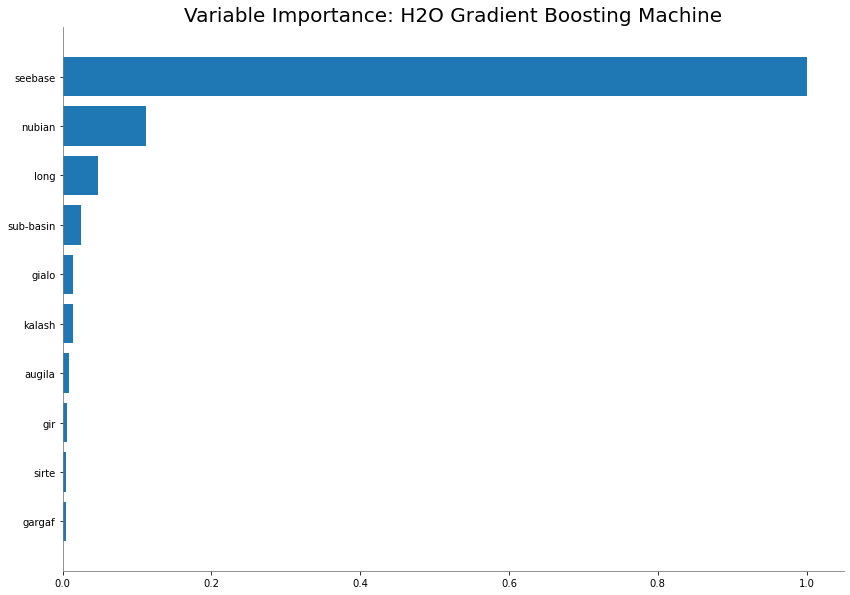

In [11]:
import matplotlib.pyplot as plt
m.varimp_plot()

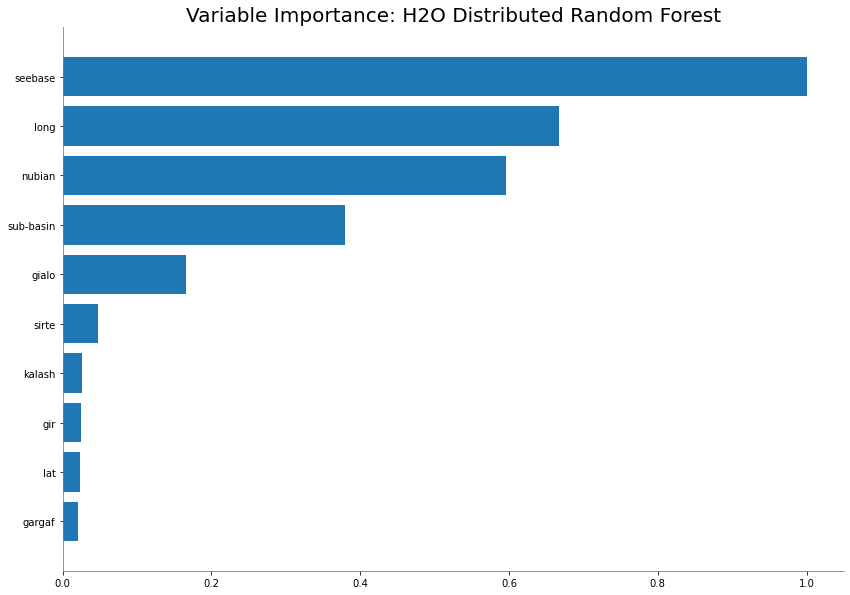

In [12]:
m2 = h2o.get_model("DRF_1_AutoML_1_20220110_151432")

m2.varimp(True)
m2.varimp_plot()


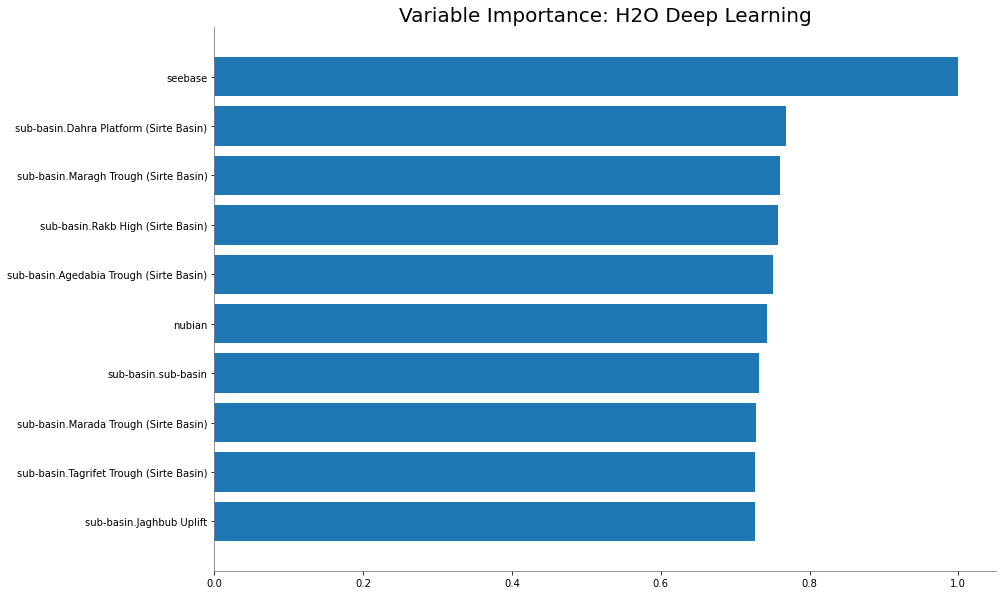

In [25]:
m3 = h2o.get_model("DeepLearning_grid_1_AutoML_1_20211216_154928_model_5")

m3.varimp(True)
m3.varimp_plot()


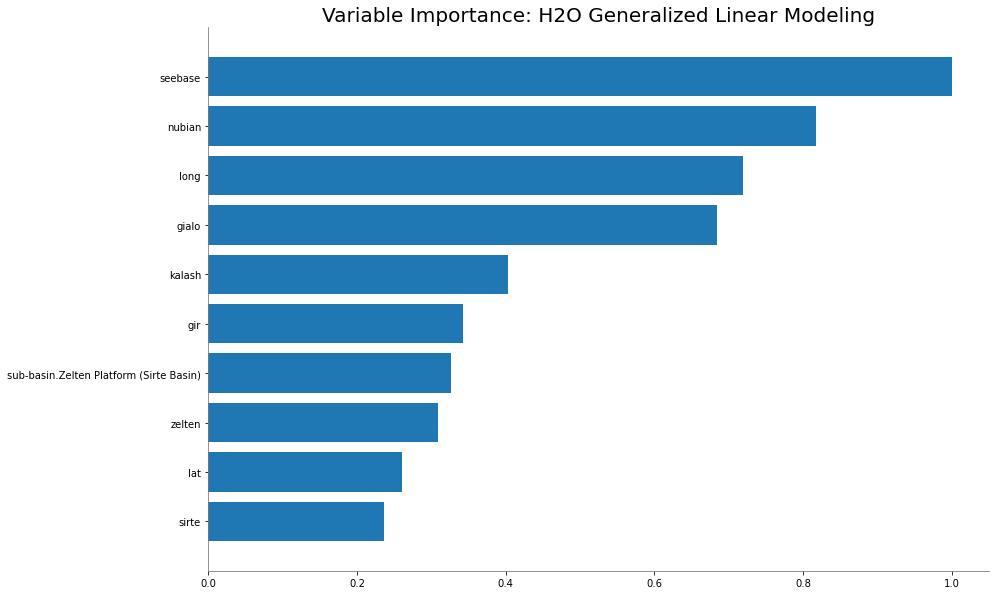

In [26]:
m4 = h2o.get_model("GLM_1_AutoML_1_20211216_154928")

m4.varimp(True)
m4.varimp_plot()

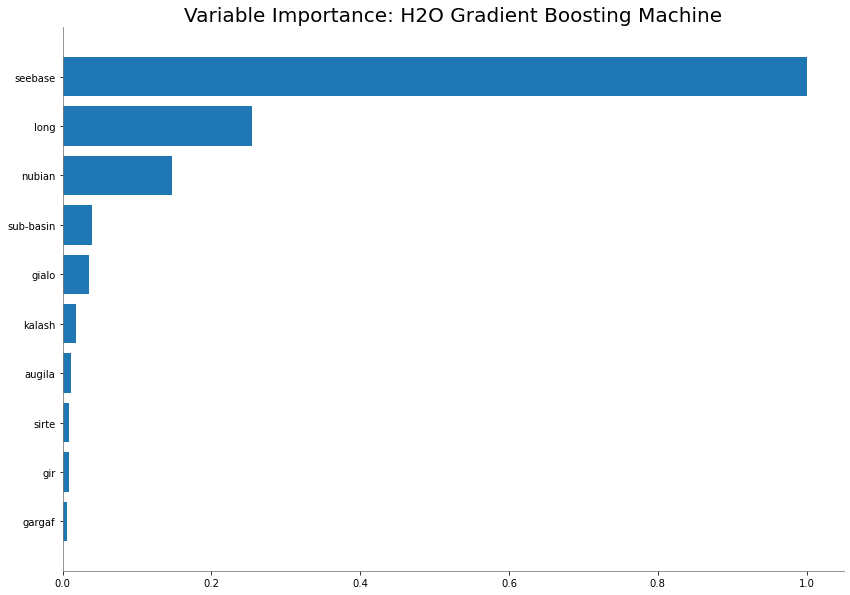

In [13]:
m5 = h2o.get_model("GBM_5_AutoML_1_20220110_151432")

m5.varimp(True)
m5.varimp_plot()


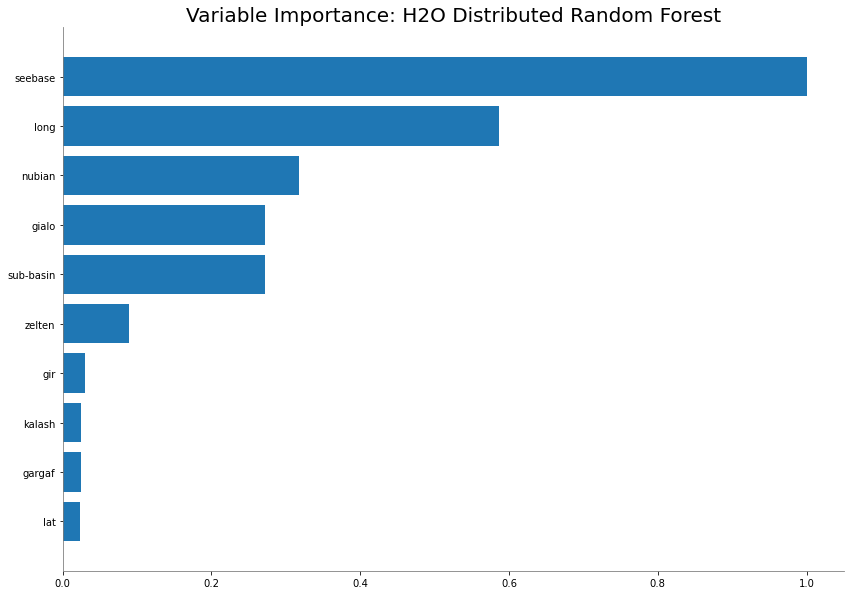

In [14]:
m6 = h2o.get_model("XRT_1_AutoML_1_20220110_151432")

m6.varimp(True)
m6.varimp_plot()


## Prediction on the test data

In [15]:
# Predict using the leader model on the test data

pred = aml.predict(test)
pred.head()


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
-2888.21
-1981.28
-1872.75
-1899.37
-2745.07
-2825.08
-2987.91
-1897.74
-2050.09
-2777.97


# Model performance

In [16]:
# Model performance applied to the AutoML leader model and a test set to generate an H2O model performance object.

perf = aml.leader.model_performance(test)
perf


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 12751.61743257845
RMSE: 112.9230597910739
MAE: 75.72998235900016
RMSLE: NaN
Mean Residual Deviance: 12751.61743257845


# Blind well test

In [17]:
#Import blind wells

blind=h2o.upload_file("/Home/DEF/4/J1040904/Desktop/Projects/Data science/Basement project/Python/AutoML H2O/Final run v3/blind.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
blind.describe()

Rows:22
Cols:14




,ÃƒÆ’Ã‚Â¯Ãƒâ€šÃ‚Â»Ãƒâ€šÃ‚Â¿well_name,long,lat,augila,gialo,gir,zelten,kalash,sirte,nubian,gargaf,basement,seebase,sub-basin
type,string,real,real,real,real,real,real,real,real,real,real,real,real,enum
mins,NaN,17.963376,27.299121,34.51292368,274.1099732,310.52792,135.0707145,27.5627,33.5,0.509335,24.9825,-3400.091441,-3856.915996,
mean,NaN,21.032228904761904,28.24407614285714,86.25074024190475,412.09707852380956,528.5585106952382,153.13628499523813,68.06008095238096,114.25333333333332,139.29284404761907,83.70441904761907,-2509.8680924285713,-2534.4625585714284,
maxs,NaN,23.397623,29.527203,144.9433065,562.8383321,690.0176786,206.0808339,193.645,160.0,507.8913,357.68,-1583.921604,-1493.062668,
sigma,NaN,1.2686530103506988,0.5684200497860086,24.48874053124939,73.55339830465054,78.67252965394465,28.0627019933282,45.66670135473569,33.729242110271805,142.92237899480662,69.18287682146949,581.3788083531916,636.6732380755241,
zeros,0,0,0,0,0,0,0,0,0,0,0,0,0,
missing,0,1,1,1,1,1,1,1,1,1,1,1,1,0
0,ï»¿well_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,sub-basin
1,A1-105,21.954682,28.375521,62.43903926,449.8750305,512.8048037,135.4029505,82.5211,140.8,297.0178,71.8641,-2983.982565,-2976.767861,Sarir Trough (Sirte Basin)
2,A1-12,21.149383,29.132192,34.51292368,562.8383321,624.9664716,135.0707145,193.645,138.6,150.7868,117.28,-2930.050597,-3003.541819,Rakb High (Sirte Basin)


In [19]:
pred_blind = aml.predict(blind)
pred_blind.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
-2888.21
-3072.64
-2895.17
-2959.85
-2543.45
-1523.1
-3063.19
-2178.49
-2398.88
-2763.51


In [20]:
pred_blind.describe()

Rows:22
Cols:1




,predict
type,real
mins,-3625.7384124613736
mean,-2498.381260171684
maxs,-1523.0962620928321
sigma,567.4201476796316
zeros,0
missing,0
0,-2888.214735574219
1,-3072.6374572456252
2,-2895.169460444841


In [21]:
perf_blind = aml.leader.model_performance(blind)
perf_blind


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 15120.65622146726
RMSE: 122.96607752330421
MAE: 85.93755803644659
RMSLE: NaN
Mean Residual Deviance: 15120.65622146726


In [22]:
# combine prediction 
import numpy as np
blind_predicted=blind.cbind(pred_blind)
blind_predicted.describe

ÃƒÆ’Ã‚Â¯Ãƒâ€šÃ‚Â»Ãƒâ€šÃ‚Â¿well_name,long,lat,augila,gialo,gir,zelten,kalash,sirte,nubian,gargaf,basement,seebase,sub-basin,predict
ï»¿well_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,sub-basin,-2888.21
A1-105,21.9547,28.3755,62.439,449.875,512.805,135.403,82.5211,140.8,297.018,71.8641,-2983.98,-2976.77,Sarir Trough (Sirte Basin),-3072.64
A1-12,21.1494,29.1322,34.5129,562.838,624.966,135.071,193.645,138.6,150.787,117.28,-2930.05,-3003.54,Rakb High (Sirte Basin),-2895.17
A1-126,20.8285,28.1636,100.96,396.562,637.665,135.418,54.5229,157.3,507.891,98.32,-3203.61,-3295.28,Zelten Platform (Sirte Basin),-2959.85
A1-135,22.3953,27.318,85.6316,394.565,477.923,135.403,27.5627,105.7,102.293,27.2658,-2538.37,-2494.04,Sarir Trough (Sirte Basin),-2543.45
A1-57,17.9634,28.7274,85.6712,396.544,690.018,143.111,71.107,61,19.4722,133.753,-1583.92,-1493.06,Dahra Platform (Sirte Basin),-1523.1
A1-59e,20.5323,28.3954,144.943,529.551,606.212,136.64,62.6518,82.6,277.741,71.3842,-3338.26,-3227.95,Zelten Platform (Sirte Basin),-3063.19
A1-65,21.6025,27.4272,77.2495,281.541,516.901,135.403,47.0163,101.9,76.8849,24.9825,-2045.1,-2172.69,Sarir Trough (Sirte Basin),-2178.49
A1-82,22.6994,29.5272,40.3987,380.992,310.528,135.403,122.612,33.5,98.2777,357.68,-2464.66,-2427.1,Jaghbub Uplift,-2398.88
A1-Lp6d,21.6686,27.2991,85.595,395.111,440.719,135.403,47.8616,99.1,96.8337,24.9825,-2673.93,-2870.8,Sarir Trough (Sirte Basin),-2763.51


<bound method H2OFrame.describe of >

In [23]:
h2o.export_file(blind_predicted, path = "/Home/DEF/4/J1040904/Desktop/Projects/Data science/Basement project/Python/AutoML H2O/Final run v3/blind_predicted.csv", force = True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


# Prediction on all the wells

In [24]:
all_wells=h2o.upload_file("/Home/DEF/4/J1040904/Desktop/Projects/Data science/Basement project/Python/AutoML H2O/Final run v3/all_wells.csv")
all_wells.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:7318
Cols:13




,well_name,long,lat,augila,gialo,gir,zelten,kalash,sirte,nubian,gargaf,seebase,sub-basin
type,string,real,real,real,real,real,real,real,real,real,real,real,enum
mins,NaN,14.434308,25.234214,17.0274,0.0,61.316,0.0,0.004362,12.4892,0.25,3.82149,-10821.11328,
mean,NaN,20.038720562858778,28.851988684066725,83.48292383938248,357.20961836537316,516.3874284927286,111.49827080631066,105.51403013063681,154.00486434927632,163.73632256641153,71.95381084722578,-3362.712397660428,
maxs,NaN,24.959444,33.2171,244.926,1050.4,947.322,266.847,259.143,525.822,2517.78,357.68,-716.175598,
sigma,NaN,1.6872293456291336,0.7640523465579052,33.48331594186931,218.09035762702246,109.51959350565345,54.35664854974474,61.2450009530029,81.84525044905438,193.62462229900987,44.27892083504639,1366.0223237058385,
zeros,0,0,0,0,17,0,90,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,A1-105,21.954682,28.375521,62.43903926,449.8750305,512.8048037,135.4029505,82.5211,140.8,297.0178,71.8641,-2976.767861,Sarir Trough (Sirte Basin)
1,A1-12,21.149383,29.132192,34.51292368,562.8383321,624.9664716,135.0707145,193.645,138.6,150.7868,117.28,-3003.541819,Rakb High (Sirte Basin)
2,A1-126,20.828549,28.16357,100.9601317,396.5618142,637.664594,135.4181907,54.5229,157.3,507.8913,98.32,-3295.281639,Zelten Platform (Sirte Basin)


In [35]:
#put .aml for using the best model. To predict using a different model, retrieve a model from the list (give it a name, ex .m2) and use it here before .predict

pred_all_wells = aml.predict(all_wells)
pred_all_wells.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
-3099.39
-2920.91
-3228.57
-2559.9
-1677.34
-3113.71
-2289.19
-2414.91
-2681.67
-3518.83


In [26]:
pred_all_wells.describe()

Rows:7318
Cols:1




,predict
type,real
mins,-4272.678177050445
mean,-2816.4137264746055
maxs,-1381.9187695301507
sigma,663.834591380913
zeros,0
missing,0
0,-3072.6374572456252
1,-2895.169460444841
2,-2959.852251640651


# Combine columns and export data

In [36]:
import numpy as np
final_wells=all_wells.cbind(pred_all_wells)
final_wells.describe

well_name,long,lat,augila,gialo,gir,zelten,kalash,sirte,nubian,gargaf,seebase,sub-basin,predict
A1-105,21.9547,28.3755,62.439,449.875,512.805,135.403,82.5211,140.8,297.018,71.8641,-2976.77,Sarir Trough (Sirte Basin),-3099.39
A1-12,21.1494,29.1322,34.5129,562.838,624.966,135.071,193.645,138.6,150.787,117.28,-3003.54,Rakb High (Sirte Basin),-2920.91
A1-126,20.8285,28.1636,100.96,396.562,637.665,135.418,54.5229,157.3,507.891,98.32,-3295.28,Zelten Platform (Sirte Basin),-3228.57
A1-135,22.3953,27.318,85.6316,394.565,477.923,135.403,27.5627,105.7,102.293,27.2658,-2494.04,Sarir Trough (Sirte Basin),-2559.9
A1-57,17.9634,28.7274,85.6712,396.544,690.018,143.111,71.107,61,19.4722,133.753,-1493.06,Dahra Platform (Sirte Basin),-1677.34
A1-59e,20.5323,28.3954,144.943,529.551,606.212,136.64,62.6518,82.6,277.741,71.3842,-3227.95,Zelten Platform (Sirte Basin),-3113.71
A1-65,21.6025,27.4272,77.2495,281.541,516.901,135.403,47.0163,101.9,76.8849,24.9825,-2172.69,Sarir Trough (Sirte Basin),-2289.19
A1-82,22.6994,29.5272,40.3987,380.992,310.528,135.403,122.612,33.5,98.2777,357.68,-2427.1,Jaghbub Uplift,-2414.91
A1-Lp6d,21.6686,27.2991,85.595,395.111,440.719,135.403,47.8616,99.1,96.8337,24.9825,-2870.8,Sarir Trough (Sirte Basin),-2681.67
A1-Nc157,20.7203,28.359,85.8845,545.797,609.324,135.397,90.4932,132.26,214.987,99.67,-3856.92,Zelten Platform (Sirte Basin),-3518.83


<bound method H2OFrame.describe of >

In [37]:
h2o.export_file(final_wells, path = "/Home/DEF/4/J1040904/Desktop/Projects/Data science/Basement project/Python/AutoML H2O/Final run v3/all_wells_predicted_m1.csv", force = True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
